# Importation - Inspection

In [1]:
#chgt de dossier
import os
os.chdir("C:/Users/ricco/Desktop/demo")

#chargement
import pandas
D = pandas.read_excel('alcools.xlsx',sheet_name="indiv actifs")
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEOH    100 non-null    float64
 1   ACET    100 non-null    float64
 2   BU1     100 non-null    float64
 3   ISOP    100 non-null    int64  
 4   MEPR    100 non-null    float64
 5   PRO1    100 non-null    float64
 6   ACAL    100 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 5.6 KB


In [2]:
#statistiques descriptives
D.describe()

,MEOH,ACET,BU1,ISOP,MEPR,PRO1,ACAL
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,803.52500,221.033000,13.536000,95.130000,37.262000,374.16100,14.779000
std,365.78345,139.591235,9.908302,48.233995,21.010718,515.51154,11.430937
min,0.00000,13.000000,0.000000,0.000000,0.000000,23.00000,2.000000
25%,496.00000,123.750000,1.975000,69.500000,25.750000,71.75000,8.575000
50%,886.00000,178.500000,16.000000,88.500000,33.000000,181.00000,11.200000
75%,1077.25000,324.250000,20.000000,116.500000,45.250000,503.50000,16.250000
max,1548.00000,755.000000,44.000000,248.000000,127.000000,3020.00000,94.000000


# Préparation des données

In [3]:
#centrage-réduction
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
Z = std.fit_transform(D)

#type de la structure
print(type(Z))

#vérifications
import numpy
print(numpy.mean(Z,axis=0))
print(numpy.std(Z,axis=0))

<class 'numpy.ndarray'>
[ 4.32986980e-17  8.65973959e-17  4.06619183e-17  8.27116153e-17
 -5.10702591e-17  8.88178420e-18  1.39888101e-16]
[1. 1. 1. 1. 1. 1. 1.]


In [4]:
#ACP avec toutes les composantes
from sklearn.decomposition import PCA
acp_full = PCA(svd_solver='full')
acp_full.fit(Z)

PCA(svd_solver='full')

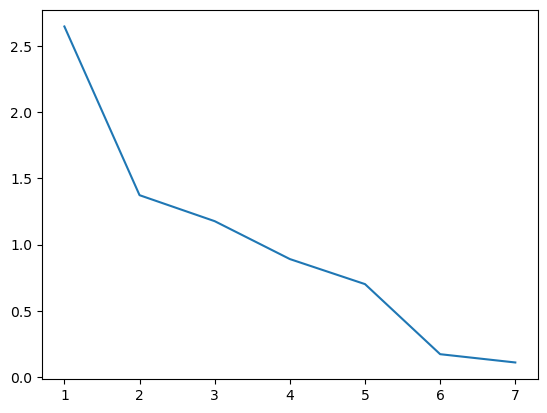

In [5]:
#screeplot
import matplotlib.pyplot as plt
plt.plot(numpy.arange(1,acp_full.n_components_+1),acp_full.explained_variance_)

In [6]:
#variance expliquée (cumulée) par les facteurs
numpy.cumsum(acp_full.explained_variance_ratio_)

array([0.37430536, 0.56847336, 0.73489463, 0.86085718, 0.96006994,
       0.98445882, 1.        ])

In [7]:
#ACP en 2 facteurs - finalement
acp = PCA(n_components=2,svd_solver='full')
F = acp.fit_transform(Z)

#affichage des coordonnées des 
dfFact = pandas.DataFrame(F,columns=['F1','F2'])
dfFact.head()

,F1,F2
0,-0.516114,-1.030670
1,0.031314,-0.444903
2,1.392829,-0.266363
3,-1.061051,-0.938873
4,1.382233,0.131638


<Axes: xlabel='F1', ylabel='F2'>

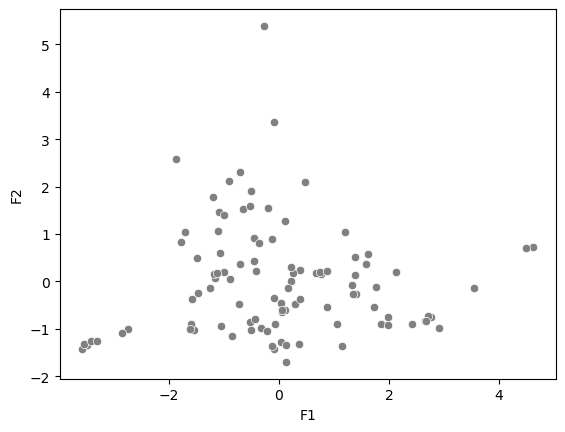

In [8]:
#graphique dans le plan
#voir : https://seaborn.pydata.org/generated/seaborn.scatterplot.html
#voir aussi pour les subtilités : https://python-charts.com/correlation/scatter-plot-seaborn/
import seaborn as sns
sns.scatterplot(dfFact,x='F1',y='F2',color='grey')

# Tandem Analysis -- K-Means sur les axes factoriels

In [9]:
#k-means sur les axes factoriels
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=0)
groupes = km.fit_predict(F)

#effectifs par groupe
print(numpy.unique(groupes,return_counts=True))

(array([0, 1, 2]), array([30, 50, 20], dtype=int64))


c:\Users\ricco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ricco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='F1', ylabel='F2'>

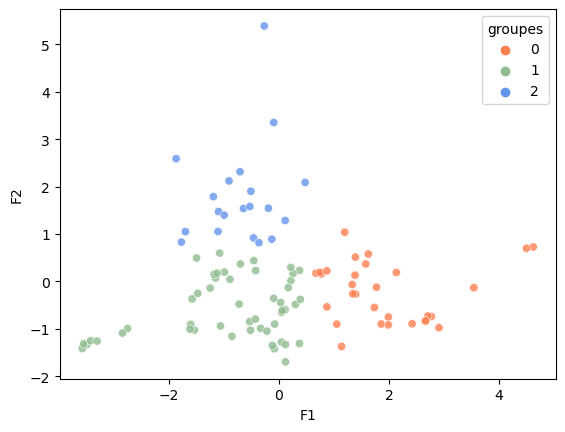

In [10]:
#représentation dans le plan factoriel
dfFact['groupes'] = groupes

#graphique
sns.scatterplot(dfFact,x='F1',y='F2',hue='groupes',palette=['coral','darkseagreen','cornflowerblue'],alpha=0.8)

In [11]:
#calculer les barycentres de classes
gb = dfFact.groupby(by="groupes")
barycentres = gb.mean()
print(barycentres)

               F1        F2
groupes                    
0        1.920305 -0.226437
1       -0.873434 -0.582737
2       -0.696873  1.796498


In [12]:
#on pouvait aussi les avoir autrement
km.cluster_centers_

array([[ 1.92030481, -0.22643673],
       [-0.87343352, -0.58273704],
       [-0.69687341,  1.79649769]])

In [13]:
#les faire figurer dans le graphique
barycentres['groupes'] = barycentres.index

<Axes: xlabel='F1', ylabel='F2'>

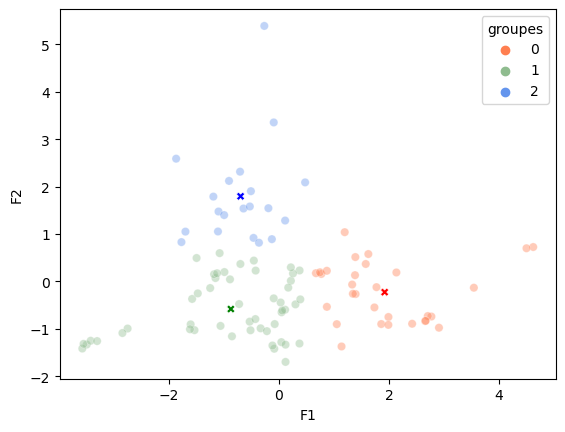

In [14]:
#récupérer des axes de réprésentation
axe = plt.gca()

#refaire le graphique avec les barycentres
#voir https://matplotlib.org/stable/api/markers_api.html pour le type de "marker"
sns.scatterplot(dfFact,x='F1',y='F2',hue='groupes',palette=['coral','darkseagreen','cornflowerblue'],ax=axe,alpha=0.4)
sns.scatterplot(barycentres,x='F1',y='F2',hue='groupes',palette=['red','green','blue'],ax=axe,legend=False,marker="X")

# Traitement des individus supplémentaires

In [15]:
#chargement des individus supplémentaires
DSupp = pandas.read_excel('alcools.xlsx',sheet_name="indiv supplementaires")
DSupp.head()

,MEOH,ACET,BU1,ISOP,MEPR,PRO1,ACAL
0,1154,203,15,123,56,50,14
1,923,296,18,112,30,173,5
2,1087,269,16,74,29,597,10


In [16]:
#application du centrage-réduction
ZSupp = std.transform(DSupp)

#affichage des valeurs
print(ZSupp[:,:])

[[ 0.96297585 -0.12983514  0.14849924  0.58071914  0.89632343 -0.6319821
  -0.06849171]
 [ 0.32827317  0.53975215  0.45280098  0.35151531 -0.34737436 -0.39218213
  -0.8597952 ]
 [ 0.7788846   0.34535584  0.24993315 -0.4402797  -0.39520889  0.43444541
  -0.42018215]]


In [17]:
#projeter dans le repère factoriel
dfFactSupp = pandas.DataFrame(acp.transform(ZSupp),columns=['F1','F2'])
dfFactSupp

,F1,F2
0,1.392829,-0.266363
1,0.409176,-0.412988
2,0.028218,-0.037222


<Axes: xlabel='F1', ylabel='F2'>

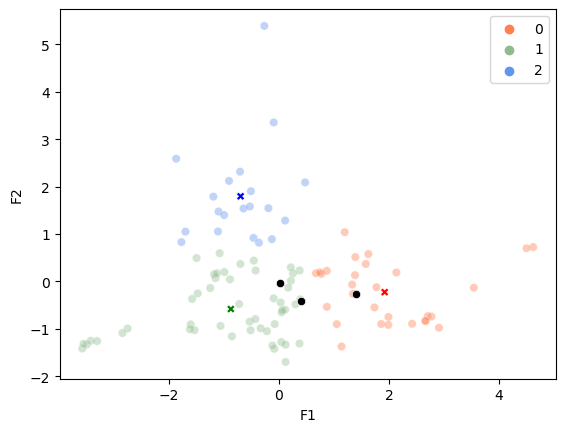

In [18]:
#récupérer des axes de réprésentation
axe = plt.gca()

#graphique individus actifs avec les groupes d'appartenance et les barycentres
sns.scatterplot(dfFact,x='F1',y='F2',hue='groupes',palette=['coral','darkseagreen','cornflowerblue'],ax=axe,alpha=0.4)
sns.scatterplot(barycentres,x='F1',y='F2',hue='groupes',palette=['red','green','blue'],ax=axe,legend=False,marker="X")
#ajout des individus supplémentaires
sns.scatterplot(dfFactSupp,x='F1',y='F2',ax=axe,color='black')

In [19]:
#prédiction de classes - vérification
predGroupes = km.predict(dfFactSupp.values)
print(predGroupes)

[0 1 1]


In [20]:
#distances aux centres de classes
km.transform(dfFactSupp.values)

array([[0.5289847 , 2.28823919, 2.93636652],
       [1.52260051, 1.29379341, 2.47086447],
       [1.90152393, 1.05383247, 1.97187368]])

# Création d'un pipeline

In [21]:
#importation de l'outil
from sklearn.pipeline import Pipeline
#actions = liste de tuples
wkf = Pipeline([('cr',StandardScaler()),
                ('pca',PCA(n_components=2,svd_solver='full')),
                ('cm',KMeans(n_clusters=3,random_state=0))])

In [22]:
#création des groupes d'une traite
#à partir des données actives initiales
grpPipe = wkf.fit_predict(D)
print(numpy.unique(grpPipe,return_counts=True))

(array([0, 1, 2]), array([30, 50, 20], dtype=int64))


c:\Users\ricco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ricco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
#croisement
pandas.crosstab(groupes,grpPipe)

col_0,0,1,2
row_0,,,
0,30,0,0
1,0,50,0
2,0,0,20


In [24]:
#application aux individus supplémentaires
#avec les coordonnées initiales
predGrpPipe = wkf.predict(DSupp)
print(predGrpPipe)

[0 1 1]


In [25]:
#et les distances aux centres de classes ?
wkf.transform(DSupp)

array([[0.5289847 , 2.28823919, 2.93636652],
       [1.52260051, 1.29379341, 2.47086447],
       [1.90152393, 1.05383247, 1.97187368]])

# Sauvegarde dans un fichier pickle

In [26]:
#pickle
import pickle

#ouvrir le fichier en écriture
f = open("tandem_1_workflow.sav","wb")

#sérialisation
pickle.dump(wkf,f)

#fermer le fichier
f.close()

In [27]:
#lister le contenu du dossier
os.listdir()

['alcools.xlsx', 'tandem_1_workflow.sav']